# Morphological Opening
Use morphological opening to minimize luminosity change following Redweik et. al. 2010

In [46]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [47]:
photo_path = os.path.join("data", "DWW_3FF_117.tif")
img = cv2.imread(photo_path)

In [84]:
def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length l and a sigma of sig
    https://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy
    """

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

In [99]:
kernel_size = 3
# kernel = np.ones((kernel_size, kernel_size), np.uint8)
kernel = gkern(kernel_size)

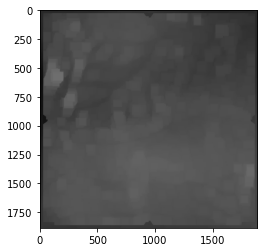

In [101]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=30)
plt.imshow(opening)
plt.show()

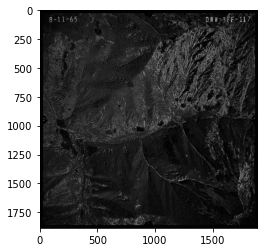

In [92]:
diff = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.imshow(diff)
plt.show()